In [15]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
players = pd.read_csv(r"C:\myProject\pythonNotebooks\ICD_NBA_Proj_UFPB\DataSets\players.csv")
teams = pd.read_csv(r"C:\myProject\pythonNotebooks\ICD_NBA_Proj_UFPB\DataSets\teams.csv")
games = pd.read_csv(r"C:\myProject\pythonNotebooks\ICD_NBA_Proj_UFPB\DataSets\games.csv")
details = pd.read_csv(r"C:\myProject\pythonNotebooks\ICD_NBA_Proj_UFPB\DataSets\games_details.csv")
ranking = pd.read_csv(r"C:\myProject\pythonNotebooks\ICD_NBA_Proj_UFPB\DataSets\ranking.csv")

C:\Users\reube\AppData\Local\Temp\ipykernel_17660\3973770738.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  details = pd.read_csv(r"C:\myProject\pythonNotebooks\ICD_NBA_Proj_UFPB\DataSets\games_details.csv")


In [17]:
details = details.drop_duplicates(subset=["GAME_ID", "PLAYER_NAME"])
details.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,23:54,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,NaN,30:52,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,NaN,33:46,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0


In [18]:
bron = details[details["PLAYER_NAME"] == "LeBron James"].drop(["TEAM_ID", "TEAM_CITY", "PLAYER_ID", "PLAYER_NAME", "COMMENT"], axis=1)
bron.head()

,GAME_ID,TEAM_ABBREVIATION,NICKNAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
405,22101004,LAL,LeBron,C,35:42,18.0,25.0,0.720,6.0,9.0,...,0.0,7.0,7.0,6.0,0.0,1.0,3.0,3.0,50.0,22.0
568,22100985,LAL,LeBron,C,45:16,9.0,26.0,0.346,1.0,9.0,...,2.0,12.0,14.0,12.0,1.0,4.0,5.0,1.0,23.0,-17.0
1045,22100973,LAL,LeBron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1445,22100959,LAL,LeBron,C,38:33,19.0,31.0,0.613,6.0,11.0,...,2.0,8.0,10.0,3.0,0.0,1.0,4.0,0.0,56.0,13.0
1837,22100945,LAL,LeBron,F,37:04,8.0,18.0,0.444,2.0,9.0,...,1.0,7.0,8.0,4.0,0.0,1.0,4.0,2.0,26.0,-27.0


In [19]:
games_date = games[["GAME_DATE_EST", "GAME_ID", "SEASON"]]
games_date.head()

,GAME_DATE_EST,GAME_ID,SEASON
0,2022-03-12,22101005,2021
1,2022-03-12,22101006,2021
2,2022-03-12,22101007,2021
3,2022-03-12,22101008,2021
4,2022-03-12,22101009,2021


In [20]:
stats = bron.merge(games_date, on="GAME_ID", how="left")

In [21]:
seasonal_stats = stats.groupby("SEASON").sum()/stats.groupby("SEASON").count()

## PPG: Pontos por Jogo

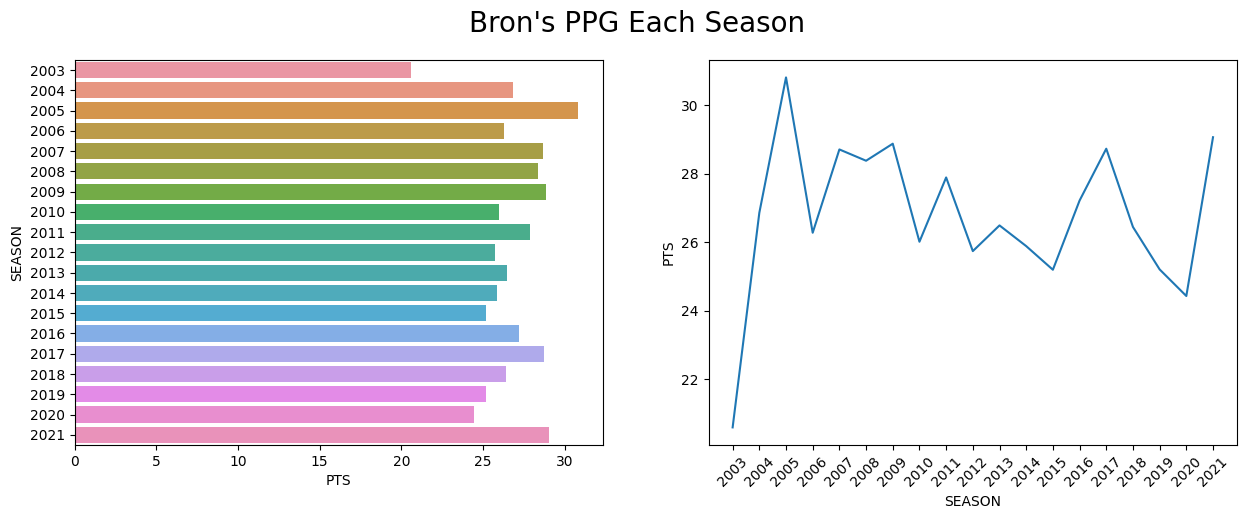

In [22]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Bron's PPG Each Season", fontsize=20)
sns.barplot(x=seasonal_stats["PTS"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["PTS"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

## APG: Assistências por Jogo

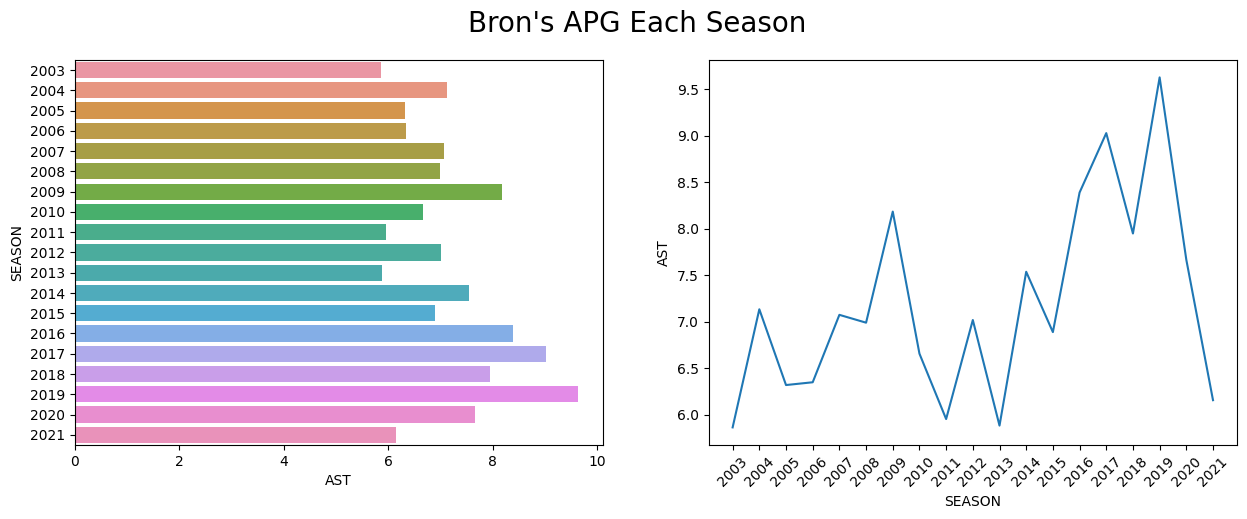

In [23]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Bron's APG Each Season", fontsize=20)
sns.barplot(x=seasonal_stats["AST"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["AST"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

## RPG: Rebotes por Jogo

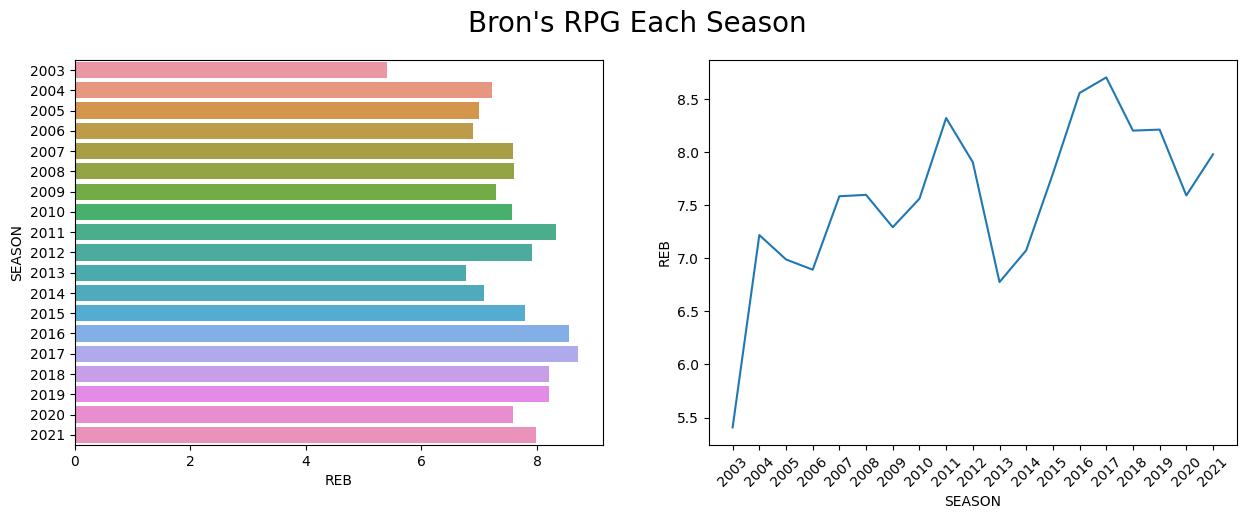

In [24]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Bron's RPG Each Season", fontsize=20)
sns.barplot(x=seasonal_stats["REB"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["REB"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

## BPG: Bloqueios por Jogo

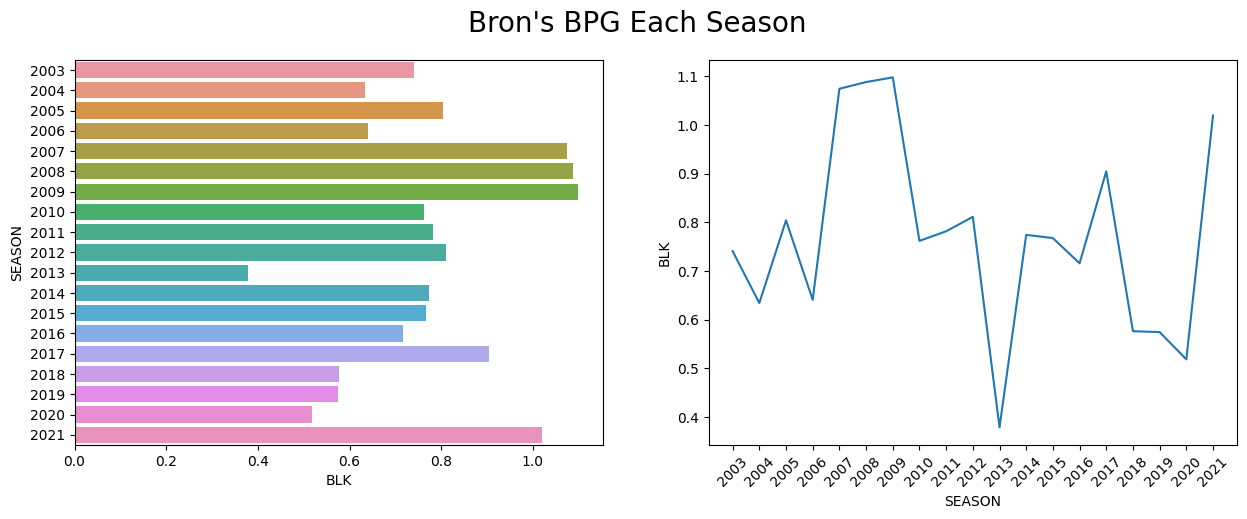

In [25]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Bron's BPG Each Season", fontsize=20)
sns.barplot(x=seasonal_stats["BLK"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["BLK"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

## SPG: Roubos por Jogo

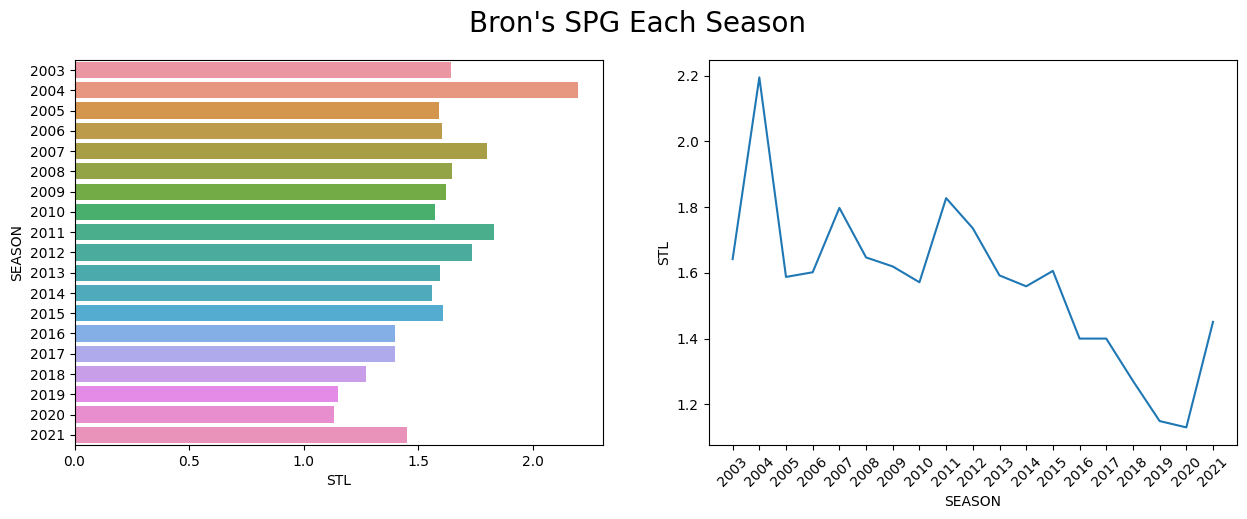

In [26]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Bron's SPG Each Season", fontsize=20)
sns.barplot(x=seasonal_stats["STL"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["STL"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

## Porcetagem de Acerto dos Arremessos

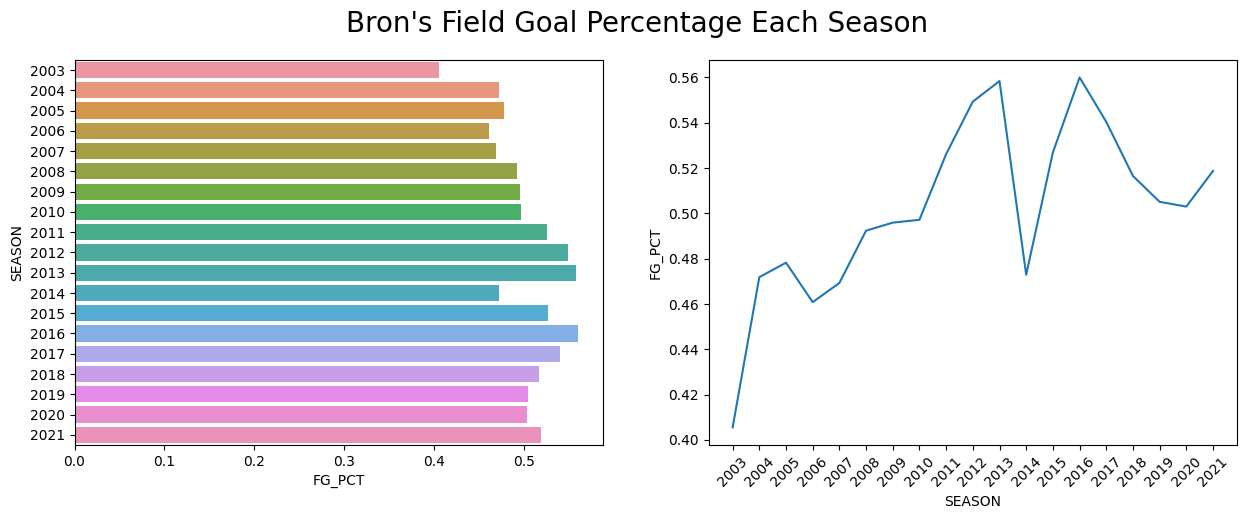

In [27]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Bron's Field Goal Percentage Each Season", fontsize=20)
sns.barplot(x=seasonal_stats["FG_PCT"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["FG_PCT"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)


## Vantagem ou Desvantagem após o jogador entra em quadra

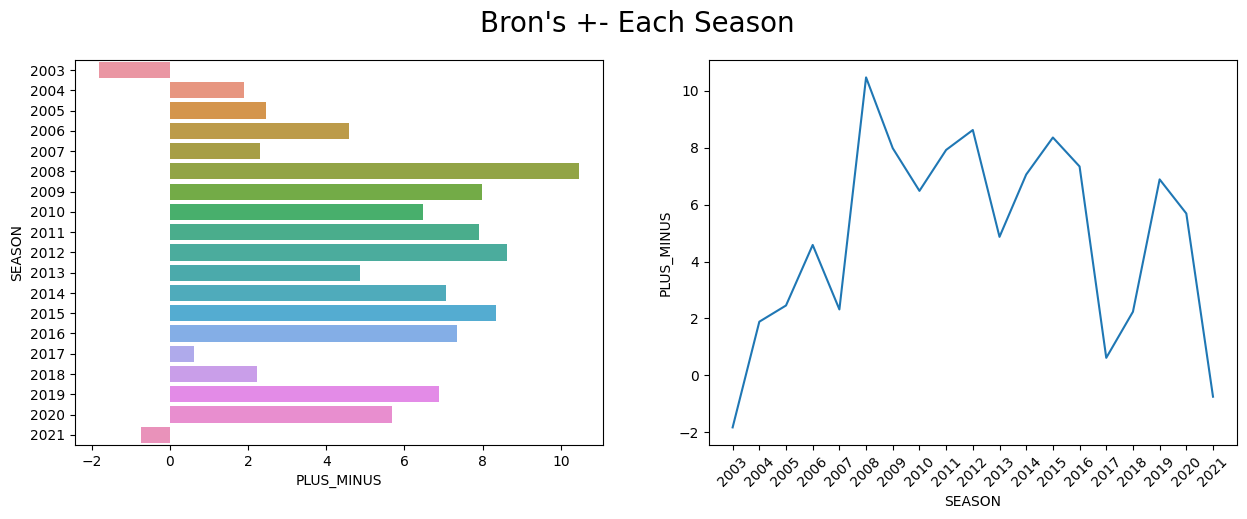

In [28]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Bron's +- Each Season", fontsize=20)
sns.barplot(x=seasonal_stats["PLUS_MINUS"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["PLUS_MINUS"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)